In [14]:
import pandas as pd
import numpy as np

In [15]:
data = pd.read_csv('./data/sales_train.csv')

In [16]:
data.dtypes

unique_id            int64
date                object
warehouse           object
total_orders       float64
sales              float64
sell_price_main    float64
availability       float64
type_0_discount    float64
type_1_discount    float64
type_2_discount    float64
type_3_discount    float64
type_4_discount    float64
type_5_discount    float64
type_6_discount    float64
dtype: object

In [17]:
data['date'] = pd.to_datetime(data['date'])
data['unique_id'] = data['unique_id'].astype('category')
data['warehouse'] = data['warehouse'].astype('category')
data = data.drop('availability', axis=1)

In [18]:
data['warehouse'].value_counts()

warehouse
Prague_1       780566
Prague_3       779655
Prague_2       770709
Brno_1         643637
Budapest_1     574582
Munich_1       259333
Frankfurt_1    198937
Name: count, dtype: int64

In [20]:
data.isna().sum()

unique_id           0
date                0
warehouse           0
total_orders       52
sales              52
sell_price_main     0
type_0_discount     0
type_1_discount     0
type_2_discount     0
type_3_discount     0
type_4_discount     0
type_5_discount     0
type_6_discount     0
dtype: int64

In [21]:
data = data.dropna()

In [22]:
data.describe()

,date,total_orders,sales,sell_price_main,type_0_discount,type_1_discount,type_2_discount,type_3_discount,type_4_discount,type_5_discount,type_6_discount
count,4007367,4.007367e+06,4.007367e+06,4.007367e+06,4.007367e+06,4.007367e+06,4.007367e+06,4.007367e+06,4.007367e+06,4.007367e+06,4.007367e+06
mean,2022-09-17 11:52:27.934592,5.995722e+03,1.083808e+02,1.814222e+02,8.518080e-03,1.240915e-04,1.163208e-03,5.452890e-06,5.680252e-03,4.049758e-04,1.045494e-02
min,2020-08-01 00:00:00,4.580000e+02,0.000000e+00,2.000000e-02,-2.094930e+01,0.000000e+00,0.000000e+00,0.000000e+00,-4.712000e-02,0.000000e+00,-8.014900e-01
25%,2021-11-09 00:00:00,4.402000e+03,1.798000e+01,2.113000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2022-10-23 00:00:00,5.515000e+03,3.952000e+01,4.564000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,2023-08-17 00:00:00,8.011000e+03,9.447000e+01,1.121300e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,2024-06-02 00:00:00,1.847500e+04,2.631619e+04,2.168299e+04,9.916400e-01,5.000000e-01,7.637200e-01,2.506300e-01,4.529000e-01,6.691400e-01,9.000500e-01
std,NaN,2.479598e+03,3.603327e+02,4.611040e+02,5.146927e-02,5.142848e-03,1.879989e-02,8.922494e-04,2.892983e-02,9.199973e-03,5.545069e-02


In [23]:
discounts = [f'type_{i}_discount' for i in range(7)]
for discount in discounts:
    data.loc[data[discount] < 0, discount] = 0

In [24]:
data.describe()

,date,total_orders,sales,sell_price_main,type_0_discount,type_1_discount,type_2_discount,type_3_discount,type_4_discount,type_5_discount,type_6_discount
count,4007367,4.007367e+06,4.007367e+06,4.007367e+06,4.007367e+06,4.007367e+06,4.007367e+06,4.007367e+06,4.007367e+06,4.007367e+06,4.007367e+06
mean,2022-09-17 11:52:27.934592,5.995722e+03,1.083808e+02,1.814222e+02,8.532168e-03,1.240915e-04,1.163208e-03,5.452890e-06,5.680263e-03,4.049758e-04,1.045540e-02
min,2020-08-01 00:00:00,4.580000e+02,0.000000e+00,2.000000e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2021-11-09 00:00:00,4.402000e+03,1.798000e+01,2.113000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2022-10-23 00:00:00,5.515000e+03,3.952000e+01,4.564000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,2023-08-17 00:00:00,8.011000e+03,9.447000e+01,1.121300e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,2024-06-02 00:00:00,1.847500e+04,2.631619e+04,2.168299e+04,9.916400e-01,5.000000e-01,7.637200e-01,2.506300e-01,4.529000e-01,6.691400e-01,9.000500e-01
std,NaN,2.479598e+03,3.603327e+02,4.611040e+02,4.893685e-02,5.142848e-03,1.879989e-02,8.922494e-04,2.892982e-02,9.199973e-03,5.544819e-02


<Axes: title={'center': 'total sales'}, xlabel='date'>

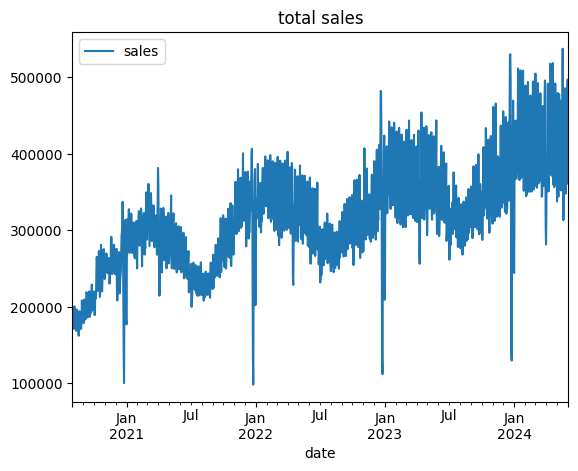

In [31]:
total = data[['date', 'sales']].groupby('date').sum().reset_index()
total.plot(x='date', y='sales', kind='line', title='total sales')

<Axes: title={'center': 'total price-weighted sales'}, xlabel='date'>

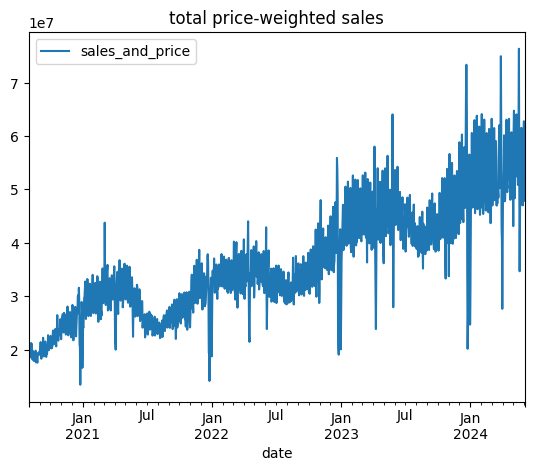

In [33]:
data['sales_and_price'] = data['sales'] * data['sell_price_main']
total = data[['date', 'sales_and_price']].groupby('date').sum().reset_index()
total.plot(x='date', y='sales_and_price', kind='line', title='total price-weighted sales')